### Importing Libraries

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

### Data Preprocessing 

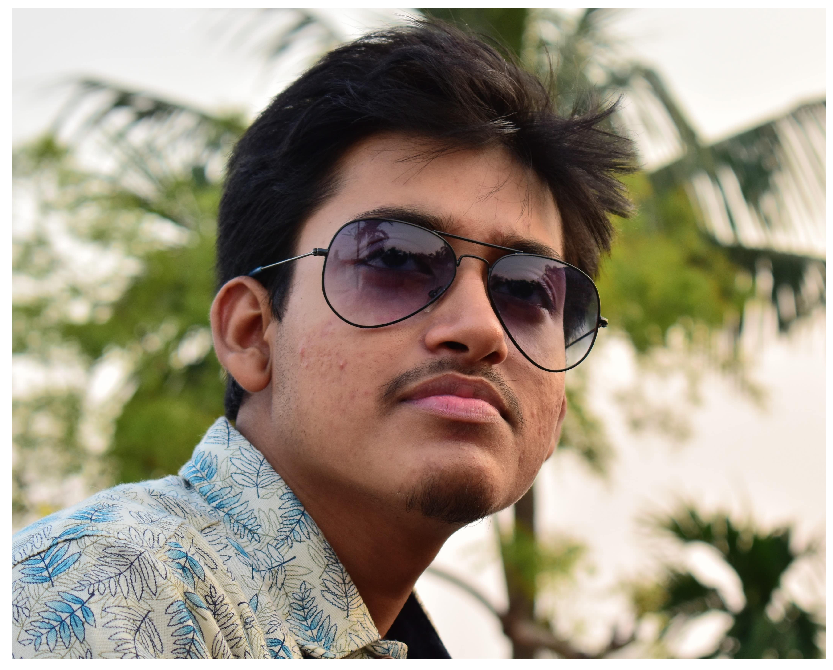

In [3]:
img= io.imread('images/rupam-photo.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(img);

In [4]:
img.shape

(3426, 4281, 3)

In [5]:
img_data=(img/255.0).reshape(-1,3)
img_data.shape

(14666706, 3)

### Visualizing the Color Space using Point Clouds

In [6]:
from plot_utils import plot_utils

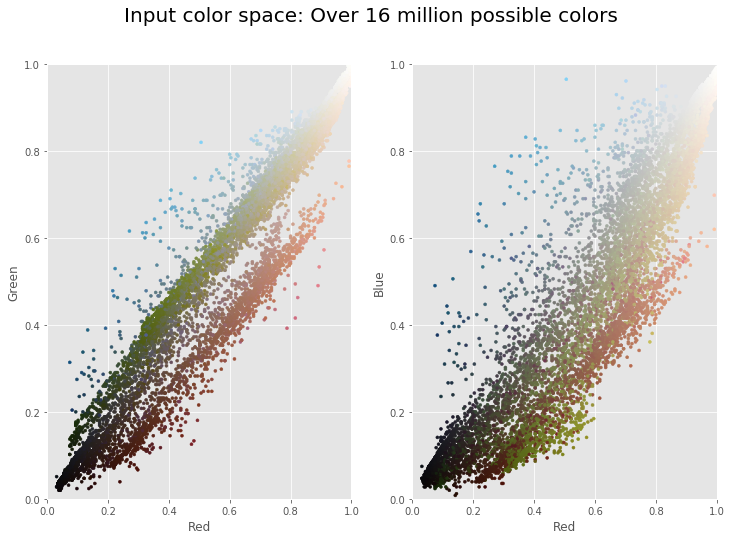

In [7]:
x=plot_utils(img_data, title="Input color space: Over 16 million possible colors")
x.colorSpace()

### Visualizing the K-means Reduced Color Space

In [8]:
from sklearn.cluster import MiniBatchKMeans

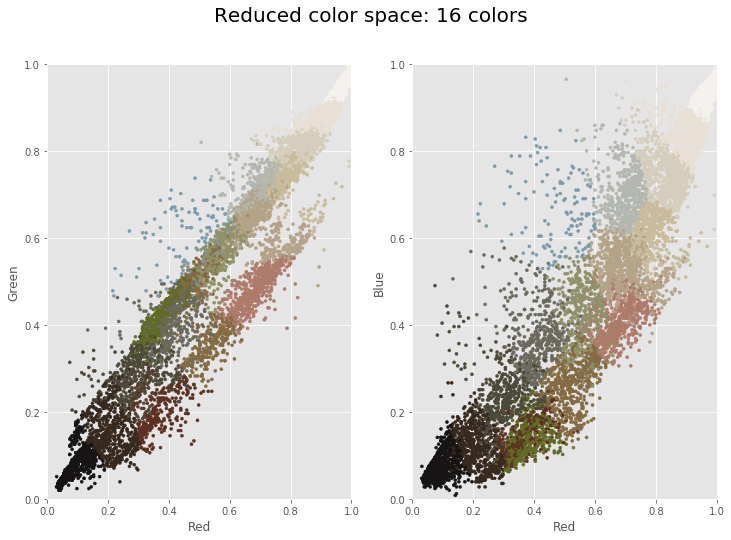

In [9]:
kmeans=MiniBatchKMeans(16) #16 clusters i.e., 16 colors
model=kmeans.fit(img_data)
k_colors=model.cluster_centers_[model.predict(img_data)]
#k_colors.shape

y=plot_utils(img_data,colors=k_colors,title="Reduced color space: 16 colors")
y.colorSpace()

### Visualizing the K-means Image Compression

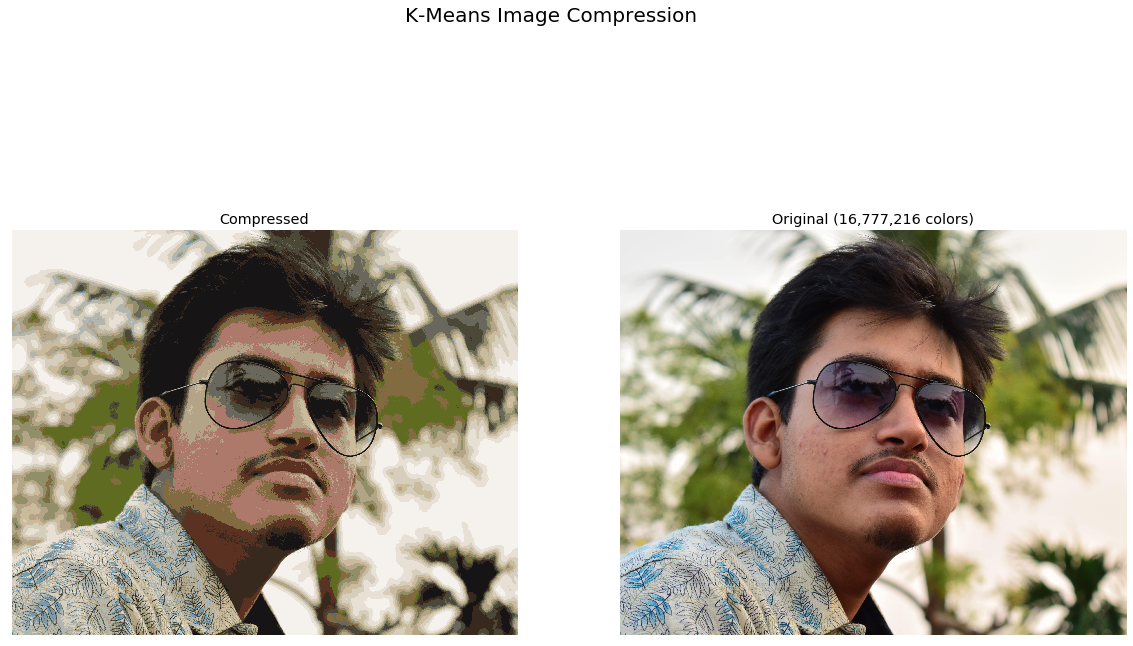

In [10]:
k_img=np.reshape(k_colors,img.shape)
    
fig, (ax1,ax2)=plt.subplots(1,2)
fig.suptitle('K-Means Image Compression',fontsize=20)
    
ax1.set_title('Compressed')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(k_img)
    
ax2.set_title('Original (16,777,216 colors)')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(img)
    
plt.subplots_adjust(top=0.85)
plt.show()